# 1.演示一下
从（0，100）点开始，以$V_0=20m/s$的初速度，$\theta=60^{\circ}$的初角度发射后的轨迹，以及速度变化。

其中阻力系数为0.1，仿真时长为3秒，步长取为0.1s

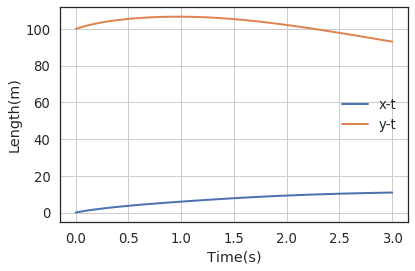

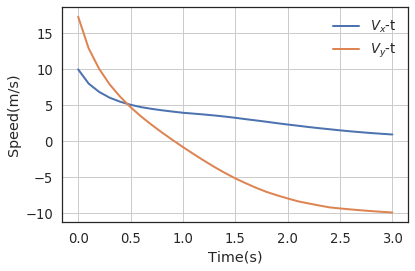

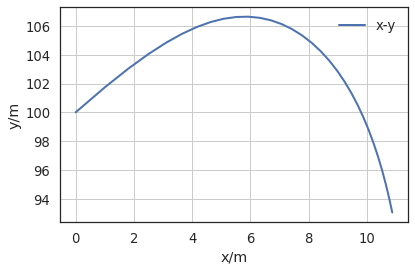

In [66]:
import OTM as otm
import numpy as np
a=otm.OTM(0,100,20,np.pi/3,0.1,3,0.1)
a.Show_xy_t()
a.Show_Vxy_t()
a.Show_position()

# 2.仿真老师的例子

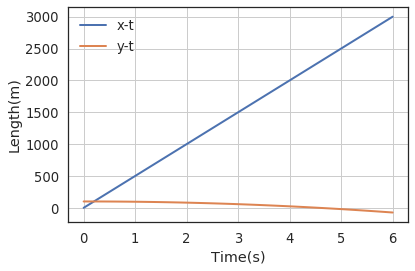

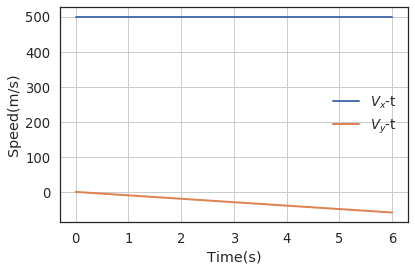

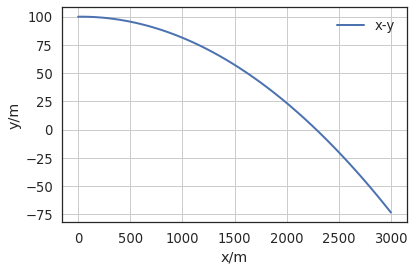

In [67]:
b=otm.OTM(0,100,500,0,0,6,0.1)
b.Show_xy_t()
b.Show_Vxy_t()
b.Show_position()

# 3.绘制OTM.cpp代码运行的数据

C++写的平抛运动代码
需要先读取OTM_cpp_data.txt文件中写入的运行数据

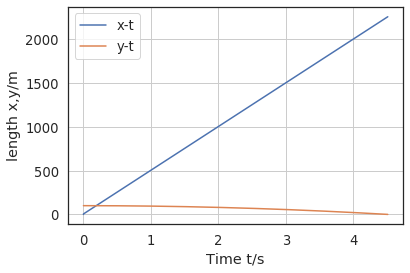

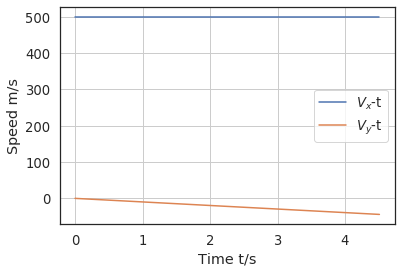

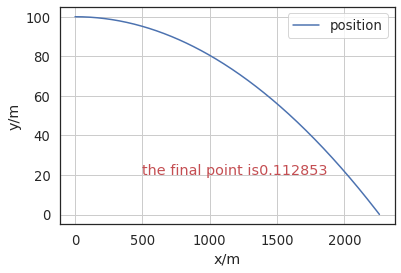

In [68]:
datac=np.loadtxt('OTM_cpp_data.txt')
tc=datac[0]
xc=datac[1]
yc=datac[2]
vxc=datac[3]
vyc=datac[4]
import matplotlib.pyplot as plt

#图1
plt.plot(tc,xc,label='x-t')
plt.plot(tc,yc,label='y-t')
plt.legend()
plt.xlabel('Time t/s')
plt.ylabel('length x,y/m')
plt.grid(True)
plt.show()

#图2
plt.plot(tc,vxc,label='$V_x$-t')
plt.plot(tc,vyc,label='$V_y$-t')
plt.legend()
plt.xlabel('Time t/s')
plt.ylabel('Speed m/s')
plt.grid(True)
plt.show()

#图3
plt.plot(xc,yc,label='position')
plt.legend()
plt.xlabel('x/m')
plt.ylabel('y/m')
plt.grid(True)
plt.text(500,20,'the final point is'+str(yc[-1]),color='r')
plt.show()

# 4.处理老师的阻力问题作业跳伞运动员

调用OTM中的OTM类别以仿真，但是需要设置初始情况：
$$
\begin{aligned}
y_0&=1000m\\
V_0&=0m/s\\
\theta&=-\frac{\pi}{2}\\
k&=\frac{1}{2}\rho S C_d
\end{aligned}
$$

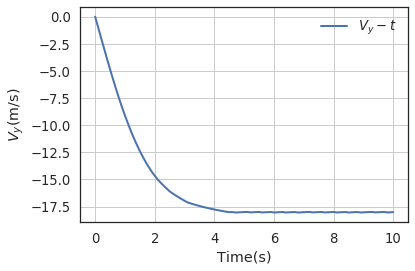

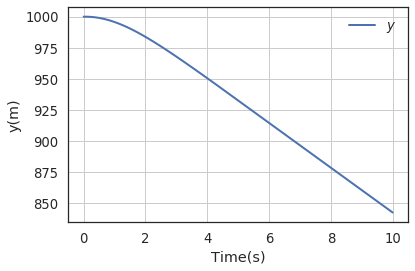

In [69]:
rho=1.225
S=1
Cd=0.05
k=rho*S*Cd/2
g=9.8
import modsim as ms

'''
调用已有的class OTM斜抛问题类进行仿真绘制
初始速度设置为0，高度设置为1000米，初始角度为-pi/2
进行仿真并绘制图像
'''
jump=otm.OTM(y0=1000,V0=0,theta=-np.pi/2,drag_k=k,t=10)

#绘制vy曲线
ms.plot(jump.frame.vy,label='$V_y-t$')
ms.decorate(xlabel='Time(s)',ylabel='$V_y$(m/s)')
plt.grid(True)
plt.show()

#h绘制y曲线
ms.plot(jump.frame.y,label='$y$')
ms.decorate(xlabel='Time(s)',ylabel='y(m)')
plt.grid(True)
plt.show()

# 5.龙格-库塔(Runge-Kutta)改进该下落问题

<ipython-input-91-1ac67909f2df>:4: RuntimeWarning: overflow encountered in double_scalars
  ay=-g-k*Vy**2


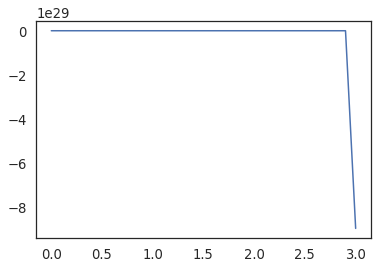

In [91]:
import my_RK4 as rk4
#g=9.8,k=0.03
def jump_fv(t,Vy):
    ay=-g-k*Vy**2
    return ay
    pass

t,y=rk4.RK4(0,0,jump_fv,h=0.1,final=10)
plt.plot(t,y)

<ipython-input-78-8f5b0dda01a2>:2: RuntimeWarning: overflow encountered in exp
  return np.exp(y)


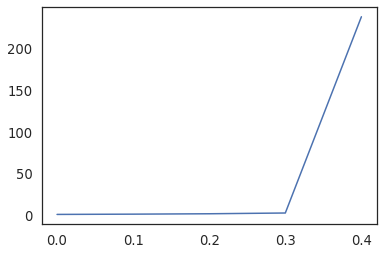

In [78]:
def ff(x,y):
    return np.exp(y)
    pass
xx,yy=rk4.RK4(0,1,ff,h=0.1,final=5)
plt.plot(xx,yy)